In [1]:
%%bash

mkdir -p TSP
mkdir -p TSP/output

genetic-algorithm/generate_input.exe -o TSP/input.txt

In [24]:
%%bash

genetic-algorithm/main.exe -i TSP/input.txt -o TSP/output/output_1.txt -mi 1000

generation: 0   	best: 3.703	average: 1.703
generation: 100   	best: 57.018	average: 34.942
generation: 200   	best: 80.759	average: 58.937
generation: 300   	best: 85.588	average: 62.795
generation: 400   	best: 90.152	average: 53.738
generation: 500   	best: 176.139	average: 93.996
generation: 600   	best: 203.270	average: 140.054
generation: 700   	best: 203.270	average: 138.807
generation: 800   	best: 196.975	average: 138.064
generation: 900   	best: 212.120	average: 132.105
out...


In [25]:
%%bash

pso-algorithm/main.exe -i TSP/input.txt -o TSP/output/output_2.txt -c1 2 -c2 2 -mi 1000

generation: 0   	best: -1390.000	average: -1755.860
generation: 1   	best: -1390.000	average: -1755.860
generation: 2   	best: -1390.000	average: -1755.860
generation: 3   	best: -1390.000	average: -1755.860
generation: 4   	best: -1390.000	average: -1755.860
generation: 5   	best: -1390.000	average: -1755.860
generation: 6   	best: -1390.000	average: -1755.860
generation: 7   	best: -1390.000	average: -1755.860
generation: 8   	best: -1390.000	average: -1755.860
generation: 9   	best: -1390.000	average: -1755.860
generation: 10   	best: -1390.000	average: -1755.860
generation: 11   	best: -1390.000	average: -1755.860
generation: 12   	best: -1390.000	average: -1755.860
generation: 13   	best: -1390.000	average: -1755.860
out...


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
def read_input(input_file) :
    with open(input_file, "r") as f:
        inp = f.read()
        lines = inp.split('\n')
        
        pts_cnt = int(lines[0])
        
        pts = []
        for i in range(0, pts_cnt):
            [x, y] = lines[i + 1].split(' ')
            x = int(x)
            y = int(y)
            pts.append((x, y))
        
        return pts

def display_pts(pts) :
    plt.plot(pts[:,0], pts[:,1], 'o', color='black')

def display_route(route_str) :
    route_str = route_str.split(',')
    N = len(route_str)
    route = np.zeros((N + 1, 2))

    for i in range(0, N):
        route[i,:] = pts[int(route_str[i]),:]

    route[N,:] = pts[int(route_str[0]),:]
    plt.plot(route[:,0], route[:,1], marker='o')
    
def get_best_route(dir) :
    out = pd.read_csv(dir, delimiter=';')
    return out.groupby(by=["generation"]).agg({'fitness':'max','solution':'first'}).sort_values(by=['fitness']).tail(1)['solution'].iloc[0]

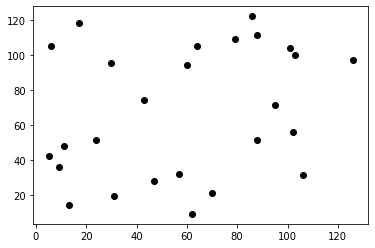

In [28]:
pts = np.array(read_input("TSP/input.txt"))

display_pts(pts)

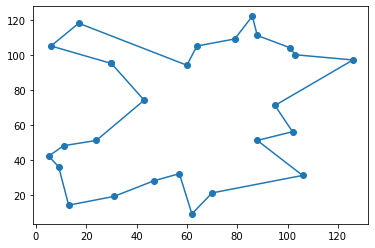

In [29]:
display_route(get_best_route("TSP/output/output_1.txt"))

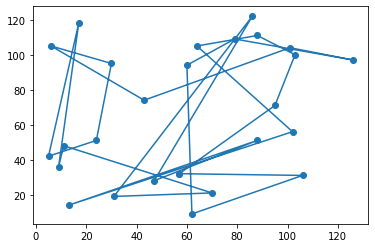

In [30]:
display_route(get_best_route("TSP/output/output_2.txt"))